<a href="https://colab.research.google.com/github/ManasaR08/Tensorflow/blob/main/Testing_model_on_custom_image_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Testing model on custom image

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/gdrive/My Drive/Food101/data_experiment/train/"
test_dir = "/content/gdrive/My Drive/Food101/data_experiment/val/"

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 400 images belonging to 2 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
model_3 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
                      ])

In [4]:
model_3.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [5]:
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1600 images belonging to 2 classes.


In [6]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
50/50 [==============================] - 1245s 24s/step - loss: 0.6324 - accuracy: 0.6306 - val_loss: 0.5169 - val_accuracy: 0.7575
Epoch 2/5
50/50 [==============================] - 30s 593ms/step - loss: 0.5736 - accuracy: 0.7025 - val_loss: 0.4810 - val_accuracy: 0.7600
Epoch 3/5
50/50 [==============================] - 29s 588ms/step - loss: 0.5154 - accuracy: 0.7319 - val_loss: 0.4797 - val_accuracy: 0.7825
Epoch 4/5
50/50 [==============================] - 29s 588ms/step - loss: 0.4704 - accuracy: 0.7819 - val_loss: 0.3994 - val_accuracy: 0.8250
Epoch 5/5
50/50 [==============================] - 29s 585ms/step - loss: 0.4406 - accuracy: 0.8044 - val_loss: 0.4049 - val_accuracy: 0.8300


In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/gdrive/My Drive/Food101/data_experiment/train")
class_names  = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [8]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import matplotlib.image as mpimg
pizza = mpimg.imread("/content/gdrive/My Drive/Food101/test_images/pizza.jpg")
steak = mpimg.imread("/content/gdrive/My Drive/Food101/test_images/steak.jpg")

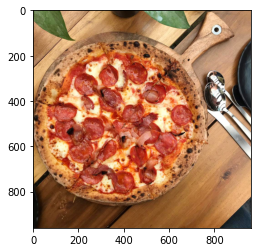

In [10]:
import matplotlib.pyplot as plt
plt.imshow(pizza)

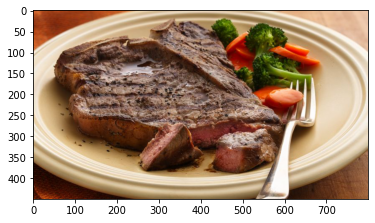

In [11]:
plt.imshow(steak)

### Preprocessing the test data

In [12]:
pizza_path = "/content/gdrive/My Drive/Food101/test_images/pizza.jpg"
steak_path = "/content/gdrive/My Drive/Food101/test_images/steak.jpg"

In [13]:
def prep_image(filepath, img_shape=224):
  img = tf.keras.preprocessing.image.load_img(filepath)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255
  return img

In [14]:
pizza_prep = prep_image(pizza_path)
steak_prep = prep_image(steak_path)

In [15]:
model_3.predict(tf.expand_dims(pizza_prep, axis=0))

array([[0.07754479]], dtype=float32)

In [18]:
pred = model_3.predict(tf.expand_dims(steak_prep, axis=0))

In [19]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [20]:
pred_class = class_names[int(tf.round(pred))]

In [21]:
pred_class

'steak'

In [23]:
def predict_and_plot(model, filepath, class_names=class_names):
  img = prep_image(filepath)
  pred = model_3.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

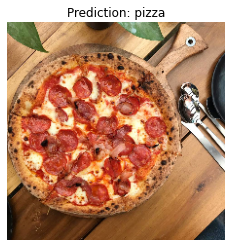

In [24]:
predict_and_plot(model_3, "/content/gdrive/My Drive/Food101/test_images/pizza.jpg")

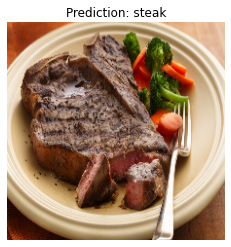

In [25]:
predict_and_plot(model_3, "/content/gdrive/My Drive/Food101/test_images/steak.jpg")